In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 ... 5 6 8]


In [3]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


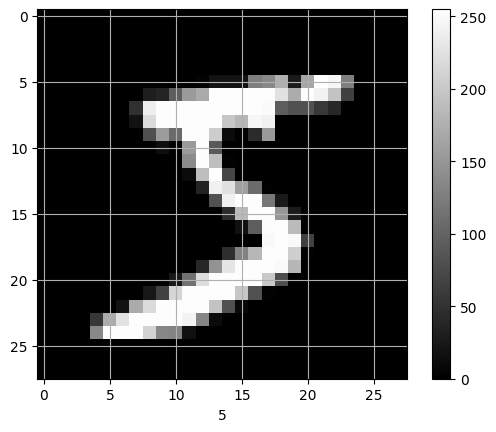

Class name: 5


In [4]:
index = 0
plt.imshow(x_train[index], cmap='gray')
plt.xlabel(class_names[y_train[index]])
plt.colorbar()
plt.grid(True)
plt.show()
print(f"Class name: {class_names[y_train[index]]}")

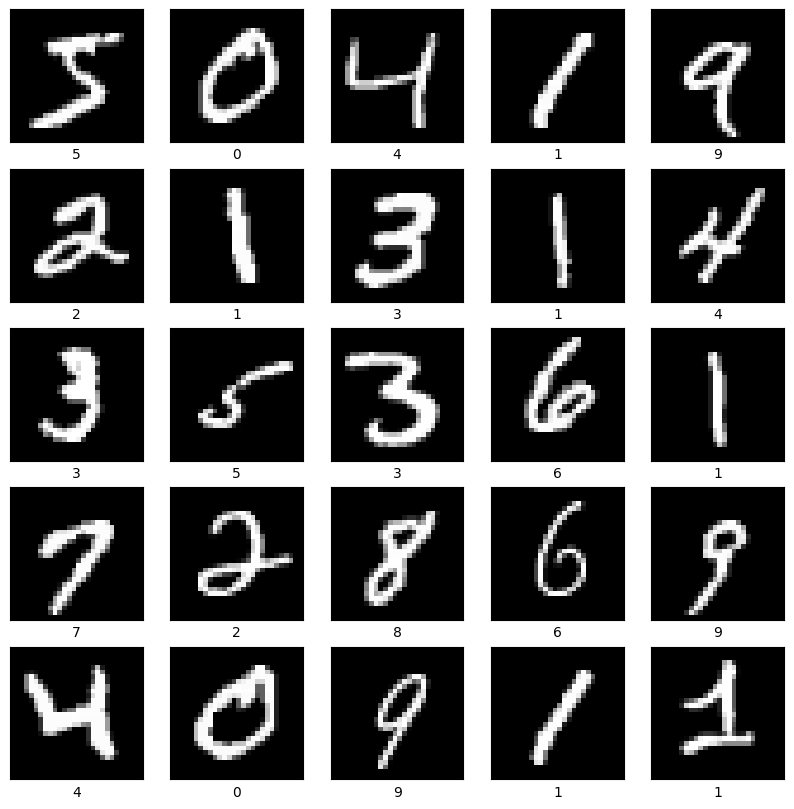

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap='gray')
  plt.xlabel(class_names[y_train[i]])

In [6]:
x_train = x_train/255.0
print(x_train.shape)

x_test = x_test/255.0
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
y_train = to_categorical(y_train)
print(y_train.shape)

y_test = to_categorical(y_test)
print(y_test.shape)

(60000, 10)
(10000, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


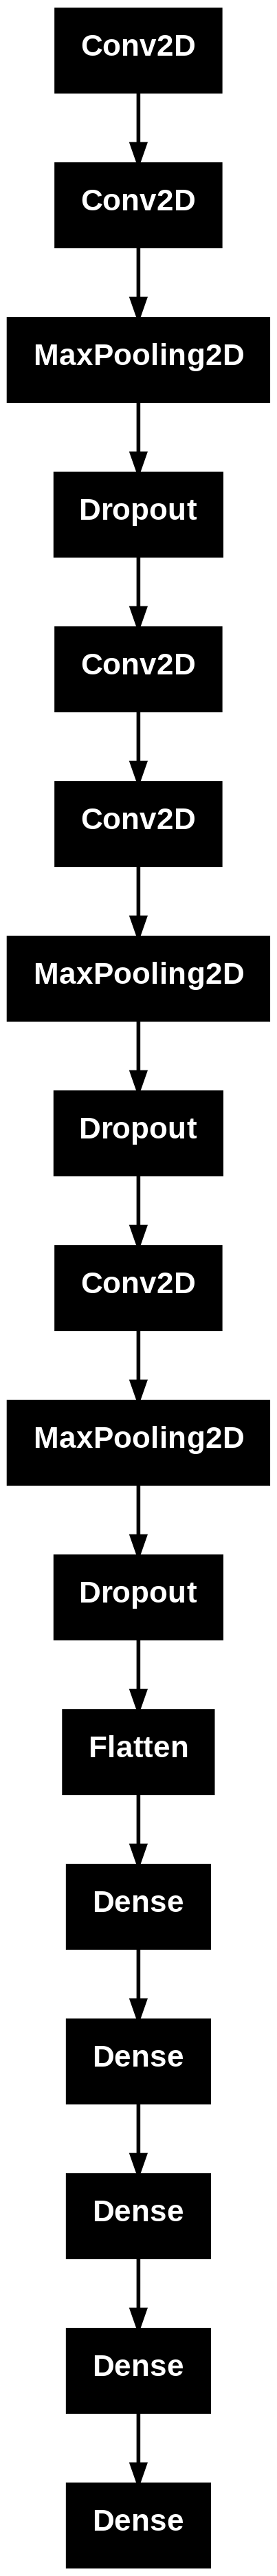

In [8]:
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(40, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

plot_model(model)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 546,838 (2.09 MB)

 Trainable params: 546,838 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
x_train2 = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test2 = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(x_train2.shape)
print(x_test2.shape)
print(y_train.shape)
print(y_test.shape)

model.fit(x_train2, y_train, epochs=10, batch_size=128, validation_data=(x_test2, y_test))

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7217 - loss: 0.7905 - val_accuracy: 0.9823 - val_loss: 0.0556
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9769 - loss: 0.0797 - val_accuracy: 0.9889 - val_loss: 0.0361
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9840 - loss: 0.0532 - val_accuracy: 0.9912 - val_loss: 0.0288
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9878 - loss: 0.0402 - val_accuracy: 0.9916 - val_loss: 0.0262
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9889 - loss: 0.0380 - val_accuracy: 0.9935 - val_loss: 0.0212
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9897 - loss: 0.0338 - val_accuracy: 0.9931 - val_loss: 0.0225
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9915 - loss: 0.0287 - val_accuracy: 0.9939 - val_loss: 0.0211
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━

In [11]:
test_loss, test_acc = model.evaluate(x_test2, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0237
Test accuracy: 0.9936000108718872


In [12]:
predictions = model.predict(x_test2)
print(predictions.shape)

print(f"Label having the highest probability: {np.argmax(predictions[0])}")
print(f"Probability of the highest probability: {np.max(predictions[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)
Label having the highest probability: 7
Probability of the highest probability: 0.9999845027923584


In [13]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  true_label=np.argmax(true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

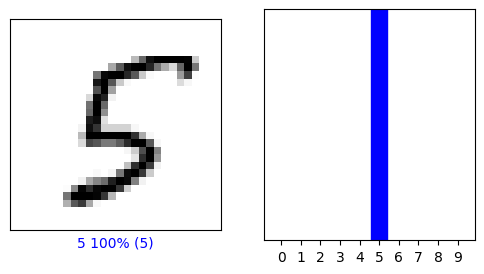

In [14]:
i=23
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], y_test)
plt.show()

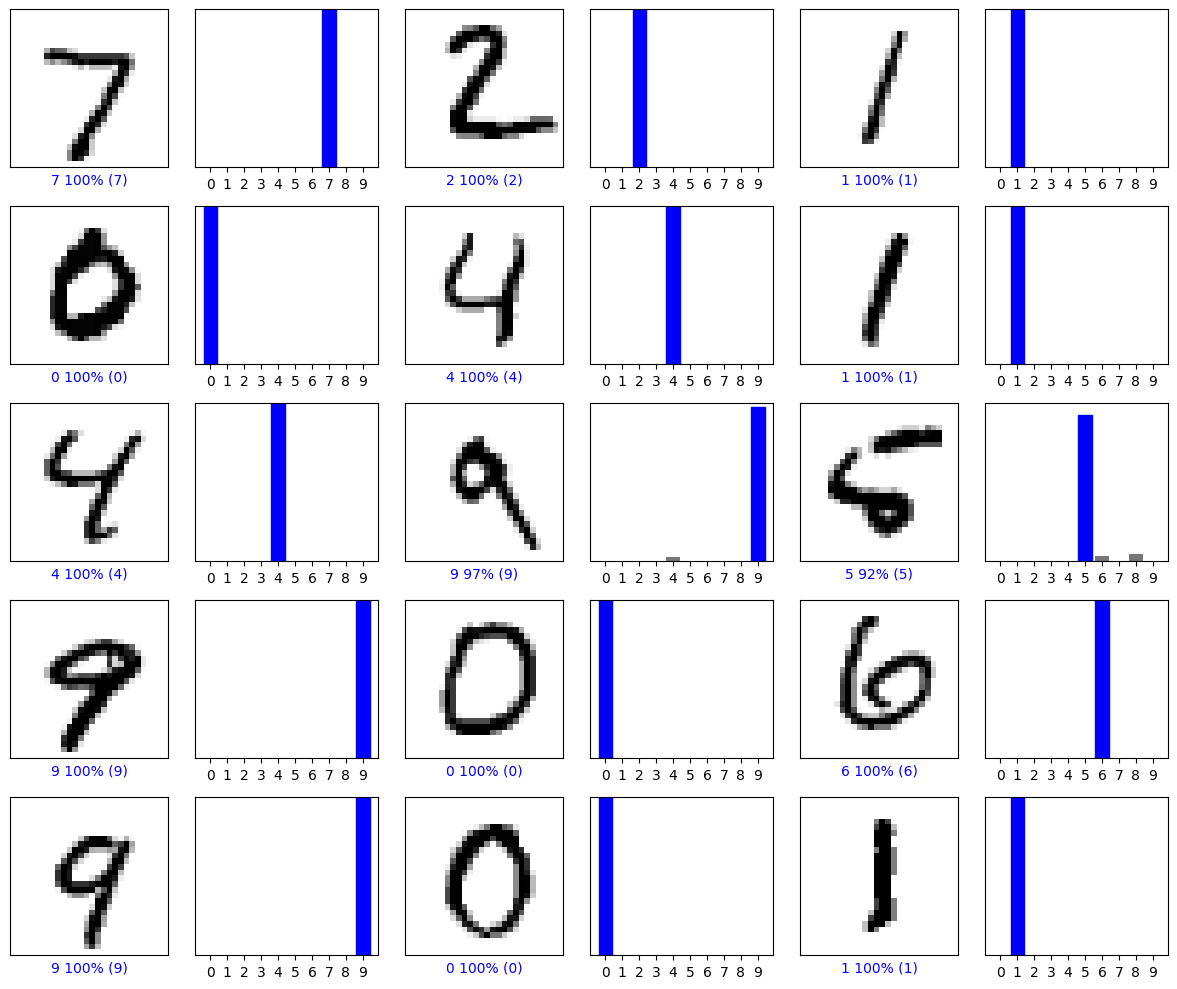

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()